### Load Data and New Variable Creation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

t_df = pd.read_json("train.json") # training set
ts_df = pd.read_json("test.json") # test set

print 'Training Set Info'
print(type(t_df))
print(t_df.shape) # 49,352 obs and 15 vars
print(t_df.columns)
print 65*'-'
print 'Test Set Info'
print(type(ts_df))
print(ts_df.shape) # 74,659 obs and 14 vars (reponse var: interest_level not provided as expected)
print(ts_df.columns)
print 65*'-'

Training Set Info
<class 'pandas.core.frame.DataFrame'>
(49352, 15)
Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')
-----------------------------------------------------------------
Test Set Info
<class 'pandas.core.frame.DataFrame'>
(74659, 14)
Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'latitude', u'listing_id',
       u'longitude', u'manager_id', u'photos', u'price', u'street_address'],
      dtype='object')
-----------------------------------------------------------------


In [191]:
tube_lat_long = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv') \
    [['Station_Name','Station_Latitude','Station_Longitude']]    

tube_lat_long = tube_lat_long.groupby('Station_Name').agg(['mean']) # unique stations only
    
stations=[]
for i in range(0,len(tube_lat_long),1):
        stations.append(
            (tube_lat_long.iloc[:,0][i],tube_lat_long.iloc[:,1][i]))
    
from geopy.distance import vincenty
import numpy as np
distance = []
for i in range(0,len(t_df['latitude']),1):
    lat_long = (list(t_df['latitude'])[i],list(t_df['longitude'])[i])
    temp=[]
    for j in stations:
        temp.append(
        vincenty(lat_long, j).meters)
    distance.append(max(temp))

t_df['dist_to_nearest_tube']= distance    

In [2]:
# Creating New Location variables: 

# new var: n_broadway
# training set:
import re
match_list = map(lambda x: re.search('broadway|b?way|b?wy',x.lower()), list(t_df['display_address']))

type_address=[]
for i in match_list:
    if i== None:
        type_address.append(0)
    elif i.group()== 'broadway' or i.group()== 'brwy' or i.group()== 'brway': #second filter
        type_address.append(1)
    else:
        type_address.append(0) 

t_df['n_broadway']= type_address # new variable starts by n_

# test set:
match_list = map(lambda x: re.search('broadway|b?way|b?wy',x.lower()), list(ts_df['display_address']))

type_address=[]
for i in match_list:
    if i== None:
        type_address.append(0)
    elif i.group()== 'broadway' or i.group()== 'brwy' or i.group()== 'brway': #second filter
        type_address.append(1)
    else:
        type_address.append(0) 

ts_df['n_broadway']= type_address # new variable starts by n_



In [3]:
# Creating new variables: n_num_keyfeat_score

# Training data:
match_list=[map(lambda x: re.search('elevator|cats|dogs|doorman|dishwasher|no fee|laundry|fitness',x.lower()),
                     list(t_df['features'])[i]) for i in np.arange(0,len(t_df['features']),1)]
nfeat_list =[] 
for i in match_list:
    if i==None:
        nfeat_list.append(0)
    else:
        if any(i)== False: # check to filter out lists with no all None values
            nfeat_list.append(0)
        else:
            lis1=[]
            map(lambda x: lis1.append(1) if x!= None else lis1.append(0),i)            
            nfeat_list.append(sum(lis1))

# new variable n_num_keyfeat_score 
nfeat_score=[]
for i in nfeat_list:
    if i<=5:
        nfeat_score.append(0)
    elif i==6:
        nfeat_score.append(1)
    elif i==7:
        nfeat_score.append(2)
    elif i==8:
        nfeat_score.append(3)
    elif i==9:
        nfeat_score.append(4)
    elif i==10:
        nfeat_score.append(5)
    else:
        nfeat_score.append(6)

t_df['n_num_keyfeat_score']= nfeat_score

# Test data:
match_list=[map(lambda x: re.search('elevator|cats|dogs|doorman|dishwasher|no fee|laundry|fitness',x.lower()),
                     list(ts_df['features'])[i]) for i in np.arange(0,len(ts_df['features']),1)]
nfeat_list =[] 
for i in match_list:
    if i==None:
        nfeat_list.append(0)
    else:
        if any(i)== False: # check to filter out lists with no all None values
            nfeat_list.append(0)
        else:
            lis1=[]
            map(lambda x: lis1.append(1) if x!= None else lis1.append(0),i)            
            nfeat_list.append(sum(lis1))

nfeat_score=[]
for i in nfeat_list:
    if i<=5:
        nfeat_score.append(0)
    elif i==6:
        nfeat_score.append(1)
    elif i==7:
        nfeat_score.append(2)
    elif i==8:
        nfeat_score.append(3)
    elif i==9:
        nfeat_score.append(4)
    elif i==10:
        nfeat_score.append(5)
    else:
        nfeat_score.append(6)

ts_df['n_num_keyfeat_score']= nfeat_score
 


In [4]:
# photos related:

# new_var: num_photos
# training 
t_df["num_photos"] = t_df["photos"].apply(len)
# test 
ts_df["num_photos"] = ts_df["photos"].apply(len)

# new variable: n_no_photo
# training set:
t_df['n_no_photo'] = [1 if i == 0 else 0 for i in map(len,t_df['photos'])]
# training set:
ts_df['n_no_photo'] = [1 if i == 0 else 0 for i in map(len,ts_df['photos'])]

In [5]:
# New Vars related to Price:
# new var: square root price
# training set
t_df['n_price_sqrt'] = t_df['price']**(0.5)
# testing set
ts_df['n_price_sqrt'] = ts_df['price']**(0.5)

# new var: log price
# training set
t_df['n_log_price'] = np.log(t_df['price'])
# testing set
ts_df['n_log_price'] = np.log(ts_df['price'])

# new var: expensive
# training set
threshold_75p = t_df[['price']].describe().loc['75%','price']
t_df['n_expensive']=[1 if i > threshold_75p else 0 for i in list(t_df['price']) ]
# test set
threshold_75p = ts_df[['price']].describe().loc['75%','price']
ts_df['n_expensive']=[1 if i > threshold_75p else 0 for i in list(ts_df['price'])]

# new var: k-neighbours using k=30 price vs median
# train:
temp = pd.read_json("price_vs_median30.json")['price_vs_median_30']
mean = np.mean(temp) 
import math
t_df['price_vs_median_30'] = [mean if math.isnan(i)== True  else round(i,2) for i in temp]

# only train done

# new var: k-neighbours using k=72 price vs median
# train:
temp = pd.read_json("price_vs_median72.json")['price_vs_median_72']
mean = np.mean(temp) 
import math
t_df['price_vs_median_72'] = [mean if math.isnan(i)== True  else round(i,2) for i in temp]


In [43]:
# new variables: extracted from features.py:

# new vars about time:

from pandas import to_datetime

# training;
t_df["created"] = to_datetime(t_df["created"])
t_df["created_year"] = t_df["created"].dt.year
t_df["created_month"] = t_df["created"].dt.month
t_df["created_day"] = t_df["created"].dt.day
# test:
ts_df["created"] = to_datetime(ts_df["created"])
ts_df["created_year"] = ts_df["created"].dt.year
ts_df["created_month"] = ts_df["created"].dt.month
ts_df["created_day"] = ts_df["created"].dt.day

# new var: num_description_words:
# training set
t_df["num_description_words"] = t_df["description"].apply(lambda x: len(x.split(" ")))
# test set
ts_df["num_description_words"] = ts_df["description"].apply(lambda x: len(x.split(" ")))

# new var: has_phone:
# training set:
phone_regex = "(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})" # http://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number
has_phone = t_df['description'].str.extract(phone_regex)
t_df['has_phone']=[type(item)==unicode for item in has_phone]
# test set
phone_regex = "(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})" # http://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number
has_phone = ts_df['description'].str.extract(phone_regex)
ts_df['has_phone']=[type(item)==unicode for item in has_phone]


# new var: distance_from_midtown

# https://github.com/geopy/geopy
# calculates vincenty dist
# https://en.wikipedia.org/wiki/Vincenty's_formulae

from geopy.distance import vincenty
lat = t_df['latitude'].tolist()
long_ = t_df['longitude'].tolist()
midtown_lat = 40.7586
midtown_long = -73.9838
distance = []
for i in range(len(lat)):
    distance.append(
        vincenty((lat[i], long_[i]), (midtown_lat, midtown_long)).meters)
t_df['distance_from_midtown'] = distance

# test:
from geopy.distance import vincenty
lat = ts_df['latitude'].tolist()
long_ = ts_df['longitude'].tolist()
midtown_lat = 40.7586
midtown_long = -73.9838
distance = []
for i in range(len(lat)):
    distance.append(
        vincenty((lat[i], long_[i]), (midtown_lat, midtown_long)).meters)
ts_df['distance_from_midtown'] = distance


# new var: dist_to_nearest_college

Baruch = (40.7402, -73.9834)
Columbia = (40.8075, -73.9626)
Cooper_Union = (40.7299, -73.9903)
FIT = (40.7475, -73.9951)
Hunter_College = (40.7685, -73.9657)
John_Jay = (40.7704, -73.9885)
Julliard = (40.7738, -73.9828)
NYU = (40.7295, -73.9965)
NYU_Tandon = (40.6942, -73.9866)
Pace_University=(40.7111, -74.0049)
Pratt_University = (40.6913, -73.9625)
The_New_School = (40.7355199, -73.99715879999997)
Weill_Cornell = (40.7650, -73.9548) 

schools = [Baruch,Columbia,Cooper_Union,FIT,Hunter_College,John_Jay, Julliard, NYU, NYU_Tandon,
          Pace_University, Pratt_University, The_New_School, Weill_Cornell]
                 
from geopy.distance import vincenty
import numpy as np
# https://github.com/geopy/geopy
# calculates vincenty dist
# https://en.wikipedia.org/wiki/Vincenty's_formulae

distance = []
for i in range(0,len(t_df['latitude']),1):
    lat_long = (list(t_df['latitude'])[i],list(t_df['longitude'])[i])
    temp=[]
    for j in schools:
        temp.append(
        vincenty(lat_long, j).meters)
    distance.append(min(temp))

t_df['dist_to_nearest_school']= distance

C:\Users\Carlo\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
C:\Users\Carlo\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [196]:
# new var: dist_to_nearest_tube
tube_lat_long = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv') \
    [['Station_Name','Station_Latitude','Station_Longitude']]    

tube_lat_long = tube_lat_long.groupby('Station_Name').agg(['mean']) # unique stations only
    
stations=[]
for i in range(0,len(tube_lat_long),1):
        stations.append(
            (tube_lat_long.iloc[:,0][i],tube_lat_long.iloc[:,1][i]))
    
from geopy.distance import vincenty
import numpy as np
distance = []
for i in range(0,len(t_df['latitude']),1):
    lat_long = (list(t_df['latitude'])[i],list(t_df['longitude'])[i])
    temp=[]
    for j in stations:
        temp.append(
        vincenty(lat_long, j).meters)
    distance.append(min(temp))

t_df['dist_to_nearest_tube']= distance    

In [7]:
# new var: management_skill

#new var to create
new_var = 'manager_id'#'manager_id_encoded'
#response var
resp_var = 'interest_level'
temp = pd.concat([t_df[new_var], pd.get_dummies(t_df[resp_var])], axis = 1).groupby(new_var).mean()
temp.columns = ['high_frac','low_frac', 'medium_frac']
temp['count'] = t_df.groupby(new_var).count().iloc[:,1]
temp['manager_skill'] = temp['high_frac']*2 + temp['medium_frac']
manager_skill=[]
for i in t_df['manager_id']:
    for j in temp.index:
        if i==j:
            manager_skill.append(temp['manager_skill'][j])
t_df['manager_skill']=manager_skill

## Setting Response and Predictor Variables

In [145]:
t_df.columns # training set cols

Index([             u'bathrooms',               u'bedrooms',
                  u'building_id',                u'created',
                  u'description',        u'display_address',
                     u'features',         u'interest_level',
                     u'latitude',             u'listing_id',
                    u'longitude',             u'manager_id',
                       u'photos',                  u'price',
               u'street_address',             u'n_broadway',
          u'n_num_keyfeat_score',             u'num_photos',
                   u'n_no_photo',           u'n_price_sqrt',
                  u'n_log_price',            u'n_expensive',
           u'price_vs_median_30',     u'price_vs_median_72',
                 u'created_year',          u'created_month',
                  u'created_day',  u'num_description_words',
                    u'has_phone',  u'distance_from_midtown',
                u'manager_skill', u'dist_to_nearest_school',
         u'dist_to_neare

### Export new DF to csv

In [123]:
# check first whether you want to export pred_logit or other model parameter list
ext = pred_logit + ['interest_level']

t_df.loc[:, ext].loc[:, ext].to_csv('new_train.csv', encoding='utf-8')
#ts_df.to_csv('new_test.csv', encoding='utf-8')

### Logit Model

**Logit Model: Select Vars**

- Bathrooms and Buildings are significant, yet they have some multicolinearity between them and against log_price
- Log Price and n_expensive are very significant, yet some thye exhibit some multicolinearity (as expected)
- New var 'distance_from_midtown' not relevant for Logit. Latitude-Longitude are more useful.


In [215]:
import pandas as pd
import numpy as np
# predictor list with variables whom relevance has been tested:
pred_logit = ['bathrooms', 'bedrooms', 'n_broadway','price_vs_median_30', 'n_log_price','n_expensive',
              'n_no_photo','num_photos', 'n_num_keyfeat_score', 'num_description_words', 'has_phone',
              'manager_skill','dist_to_nearest_tube']
## separate the predictors and response in the training data set
x = np.array(t_df.loc[:, pred_logit])
y = np.ravel(t_df.loc[:, 'interest_level'])
## separate the predictors and response in the test data set
x2 = np.array(ts_df.loc[:, pred_logit])

In [216]:
### 1. Logit Model
from sklearn import linear_model
logit_1 = linear_model.LogisticRegression()
logit_1

logit_1.set_params(C=1e4) # is the inverse of regularization strength. 
# This is opposite to the alphaused in Ridge and Lasso. Smaller values specify stronger regularization.
logit_1.fit(x, y)
print 'Predictor Parameters are:',logit_1.get_params() 
print 65*'-'
print 'Predictor Coefficients are:',logit_1.coef_
print 'Intercept',logit_1.intercept_

Predictor Parameters are: {'warm_start': False, 'C': 10000.0, 'n_jobs': 1, 'verbose': 0, 'intercept_scaling': 1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': None, 'dual': False, 'tol': 0.0001, 'solver': 'liblinear', 'class_weight': None}
-----------------------------------------------------------------
Predictor Coefficients are: [[ -1.69698985e-01   1.17511776e-01   3.56829847e-02  -1.24547828e+00
   -3.87571020e-01  -3.88119024e-01  -3.82027456e-01  -1.71238048e-02
    5.49471635e-02  -5.94429477e-04   7.82780248e-02   3.24191039e+00
   -2.42040840e-04]
 [  7.55544360e-01  -1.32714383e-01  -8.45612902e-02   2.01871099e+00
    3.26915976e-02  -2.06006721e-01   1.28212614e+00   1.89413677e-02
   -1.47549506e-01  -4.06040852e-04  -7.96152599e-02  -3.51427768e+00
    1.44660825e-07]
 [ -2.63583947e-01   2.34899689e-01   1.06032418e-02  -6.57854984e-01
   -2.01606455e-01  -3.65619120e-01  -4.95734454e-01  -5.29038573e-03
    1.48886469e-0

In [217]:
# 2) Accuracy on  Training Set
print 'Accuracy on training set:', logit_1.score(x,y) 
print 'Misc.Error on training set:', 1- logit_1.score(x,y) 

Accuracy on training set: 0.732999675798
Misc.Error on training set: 0.267000324202


In [218]:
# 3) Acid test: prediction and log-loss indicator
# http://stackoverflow.com/questions/35013822/log-loss-output-is-greater-than-1
# log-loss range is [0,inf] => the close to 0, the better
from sklearn import metrics 
y_pred = logit_1.predict(x)
y_pred_p = logit_1.predict_proba(x)
print 'Multi Class Log_loss:', metrics.log_loss(y,y_pred_p) # log_loss(x,y) => x= true label format [], x= predicted probs [[]]

Multi Class Log_loss: 0.606577702673


In [202]:
# 4) Cross-Validation:
import sklearn.cross_validation as cv

mean_error = []
std_error = []
kfold = range(3, 15)
for i in kfold:
    scores = cv.cross_val_score(logit_1, x, y, cv=i)
    mean_error.append(1-scores.mean())
    std_error.append(scores.std())
    

print 'Average .Accuracy is %f'%(1-np.mean(mean_error))
print 'Average Miscl. Error is %f'%(np.mean(mean_error))
print 'Average StDev Misc.Error is %f'%(np.mean(std_error))


Average .Accuracy is 0.731089
Average Miscl. Error is 0.268911
Average StDev Misc.Error is 0.006984


Populating the interactive namespace from numpy and matplotlib


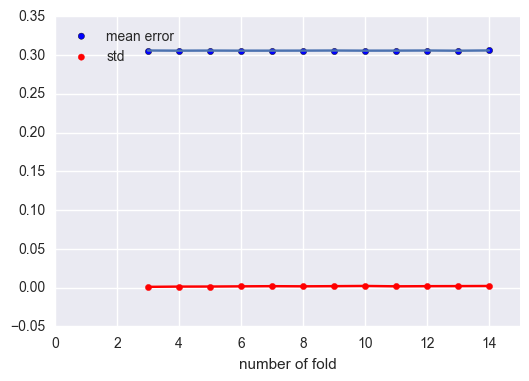

In [31]:
%pylab inline 
import matplotlib.pyplot as pl
s1 = pl.scatter(kfold, mean_error, label='mean error')
pl.plot(kfold, mean_error)
s2 = pl.scatter(kfold, std_error, color='red', label='std')
pl.plot(kfold, std_error, color='red')
pl.xlim(0, 15)
pl.xlabel('number of fold')
pl.legend(handles=[s1, s2], loc=2)

### Discriminant Models

Discriminant Analysis Models theory:
- All models (LDA, QDA, GNB) assume features follow a gaussian distribution. 
- In other words, these models are heavily impacted by fat tails and skew.
- LDA assumes different means per class but equal stand.deviation. 
- QDA assumes variance and correl between parameters is different.
- GNB (Gauss Naive Bayes) goes one step further suggesting variance is different, yet correl between features is nil. 

Observations about our training sample:
- Several important variables, like price, have high kurtosis and above-normal skew levels.
- Hence, gaussian asssumption to work out a priori conditional probabilities is a risky one.
- Leaving out non-gaussian features is not helpful: price is a very important indicator about interest_level.
- Correlation between features within each class is 0.17 on average but can move from -0.015 to 0.33. 
- Correlation between features within each class is almost the same across classes range. 
- Price and Price-related vars seem to be the ones with highest correlation with other features.
- Bathrooms-Bedrooms-Price variables all have multicolinearity risk

Training sample conclusion:
- The gaussian asssumption to work out a priori conditional probabilities is a risky one for this dataset.
- Overall intra-class feature correlations are low (0.17), yet depeding on the eventual chosen predictors Naive Bayes assumptions (nil correl) could either makes sense or not.
- Overall inter-class feature correlation differences are also within a tight range (-3% to +5%).
- Price and price-related vars are the one correlating the most with other features. 
- If we only take into consideration a single price predictor, we find it only correlated strongly with bathrooms and bedrooms (0.67 and 0.58).
 

In [279]:
t_df.groupby('interest_level').describe().loc[:,pred_logit]

bathrooms      bedrooms     longitude      latitude  \
interest_level                                                                 
high           count   3839.000000   3839.000000   3839.000000   3839.000000   
               mean       1.116176      1.546496    -73.964613     40.748007   
               std        0.341725      1.112187      0.040286      0.051965   
               min        0.000000      0.000000    -74.159800     40.575800   
               25%        1.000000      1.000000    -73.990350     40.721900   
               50%        1.000000      2.000000    -73.976300     40.746500   
               75%        1.000000      2.000000    -73.948600     40.773800   
               max        4.000000      5.000000    -73.714200     41.086800   
low            count  34284.000000  34284.000000  34284.000000  34284.000000   
               mean       1.238741      1.514759    -73.951667     40.739504   
               std        0.544946      1.111595      1.355388      0.732933   
               min        0.000000      0.000000   -118.271000      0.000000   
               25%        1.000000      1.000000    -73.991800     40.729700   
               50%        1.000000      1.000000    -73.977900     40.753800   
               75%        1.000000      2.000000    -73.956000     40.774725   
               max       10.000000      8.000000      0.000000     44.883500   
medium         count  11229.000000  11229.000000  11229.000000  11229.000000   
               mean       1.163906      1.622050    -73.965033     40.745567   
               std        0.388318      1.122604      0.698923      0.388466   
               min        0.000000      0.000000    -75.177300      0.000000   
               25%        1.000000      1.000000    -73.991800     40.726500   
               50%        1.000000      2.000000    -73.978100     40.748800   
               75%        1.000000      2.000000    -73.953300     40.772400   
               max        4.000000      7.000000      0.000000     44.603800   

                        n_broadway  price_vs_median_30   n_log_price  \
interest_level                                                         
high           count   3839.000000         3839.000000   3839.000000   
               mean       0.014587            0.824595      7.815520   
               std        0.119909            0.767489      0.386224   
               min        0.000000            0.090000      6.551080   
               25%        0.000000            0.630000      7.522941   
               50%        0.000000            0.810000      7.783224   
               75%        0.000000            0.960000      8.059276   
               max        1.000000           46.300000     11.618285   
low            count  34284.000000        34284.000000  34284.000000   
               mean       0.010442            1.163428      8.165793   
               std        0.101654            8.341650      0.441250   
               min        0.000000            0.020000      3.761200   
               25%        0.000000            0.880000      7.872836   
               50%        0.000000            1.040000      8.101678   
               75%        0.000000            1.240000      8.389360   
               max        1.000000         1407.520000     15.317363   
medium         count  11229.000000        11229.000000  11229.000000   
               mean       0.012735            0.930973      7.992128   
               std        0.112133            0.226014      0.354204   
               min        0.000000            0.140000      6.543912   
               25%        0.000000            0.780000      7.740664   
               50%        0.000000            0.940000      7.970740   
               75%        0.000000            1.060000      8.202482   
               max        1.000000            2.690000      9.615805   

                       n_expensive    n_no_photo    num_photos  \
inter

In [299]:
# Price vars have the highest correl with other features, yet still on average is low
# That said, shortlisted predictors have a dual nature with some of them exhibiting low correl and others high
# price_vs_median_30 is very local and low correl with the other two price-related predictors.

np.mean(corr_mat_high.loc[:,['n_log_price','n_expensive','price_vs_median_30']])

n_log_price           0.214972
n_expensive           0.202919
price_vs_median_30    0.130221
dtype: float64

In [222]:
corr_mat_high.loc[:,['distance_from_midtown','dist_to_nearest_tube','dist_to_nearest_school']]

,distance_from_midtown,dist_to_nearest_tube,dist_to_nearest_school
bathrooms,-0.092381,-0.024394,-0.101638
bedrooms,-0.035261,-0.061103,-0.086560
building_id,-0.053546,0.020597,-0.058467
created_day,0.024110,-0.003281,0.025046
created_month,0.029039,0.009567,0.025056
created_year,NaN,NaN,NaN
dist_to_nearest_school,0.955559,0.242775,1.000000
dist_to_nearest_tube,0.170353,1.000000,0.242775
distance_from_midtown,1.000000,0.170353,0.955559
has_phone,-0.239175,-0.002552,-0.220768


In [220]:
# n_expensive, n_log_price and price_vs_median_30 offer three ways to get price info
# price_vs_median_30 is very local and low correl with the former two
corr_mat_high.loc[:,['n_log_price','n_expensive','price_vs_median_30']]

,n_log_price,n_expensive,price_vs_median_30
bathrooms,0.438246,0.567730,-0.012696
bedrooms,0.642063,0.507885,0.025381
building_id,0.060879,0.050691,0.030076
created_day,-0.027078,-0.020424,-0.021118
created_month,-0.001680,-0.018517,0.010946
created_year,NaN,NaN,NaN
dist_to_nearest_school,-0.597045,-0.236432,-0.183980
dist_to_nearest_tube,-0.119072,-0.086830,-0.036394
distance_from_midtown,-0.539977,-0.208484,-0.170046
has_phone,0.219396,0.089825,0.050975


In [219]:
# Check correlation among features by interest_level class
corr_mat_high = t_df.groupby('interest_level').corr().loc['high']
corr_mat_medium = t_df.groupby('interest_level').corr().loc['medium']
corr_mat_low = t_df.groupby('interest_level').corr().loc['low']

print 'Average Feature Correlation %: Average for the 3 classes'
avg= 100*(np.mean(corr_mat_high) + np.mean(corr_mat_medium) + np.mean(corr_mat_low))/3
print avg
print 65*'-'
print 'Average Correlation per feature:',np.mean(avg)
print 'Max Correlation per feature:',np.max(avg)
print 'Min Correlation per feature:',np.min(avg)


Average Feature Correlation %: Average for the 3 classes
bathrooms                 16.064993
bedrooms                  16.750663
building_id                6.300507
created_day                4.693413
created_month              8.142747
created_year                    NaN
dist_to_nearest_school     9.158026
dist_to_nearest_tube       9.797203
distance_from_midtown      8.992846
has_phone                  8.287280
latitude                  -7.044536
listing_id                 9.415611
longitude                  8.892199
manager_skill              4.451198
n_broadway                 3.541817
n_expensive               18.647928
n_log_price               21.854402
n_no_photo                -0.168521
n_num_keyfeat_score       11.041983
n_price_sqrt              24.100544
num_description_words     10.370431
num_photos                 8.568384
price                     22.040795
price_vs_median_30        16.821901
price_vs_median_72        16.821901
dtype: float64
----------------------------

In [60]:
h_l_dif = np.mean(corr_mat_high - corr_mat_low)*100
h_m_dif = np.mean(corr_mat_high - corr_mat_medium) *100
m_l_dif = np.mean(corr_mat_medium - corr_mat_low) *100

print 'Average feature correlations differences across 3 classes is summarized below:' 
print 'Standard Average Correl. Dif.'
print (h_l_dif+ h_m_dif + m_l_dif)/3
print 'Abs. Value Average Correl. Dif.'
print (abs(h_l_dif)+ abs(h_m_dif) + abs(m_l_dif))/3
print 65*'-'
print 'Average feature correlations differences detail per class pairs shown below:' 
print 65*'-'
print 'Correlation Matrix  - High-Low Correl Differences %'
print 65*'-'
print h_l_dif
print 65*'-'
print 'Correlation Matrix  - High-Medium Correl Differences %'
print 65*'-'
print h_m_dif
print 65*'-'
print 'Correlation Matrix  - Medium-Low Correl Differences %'
print 65*'-'
print m_l_dif

Average feature correlations differences across 3 classes is summarized below:
Standard Average Correl. Dif.
bathrooms               -1.878136
bedrooms                 0.852161
has_phone                2.074892
latitude                 4.001767
listing_id              -0.111007
longitude               -2.988989
n_broadway              -0.601892
n_expensive              0.353824
n_log_price             -0.874444
n_no_photo               1.742858
n_num_keyfeat_score      0.076327
n_price_sqrt             0.814737
num_description_words    1.315216
price                    6.544959
dtype: float64
Abs. Value Average Correl. Dif.
bathrooms                 4.473327
bedrooms                  4.355207
has_phone                 2.111560
latitude                  4.003076
listing_id                0.229446
longitude                 2.988989
n_broadway                0.774415
n_expensive               4.857295
n_log_price               5.578755
n_no_photo                1.742858
n_num_keyfeat_scor

**Discriminant Model Vars:**

In [225]:
import pandas as pd
import numpy as np
# predictor list with variables whom relevance has been tested:
pred_disc = ['bathrooms', 'bedrooms', 'n_broadway','price_vs_median_30', 'n_log_price','n_expensive',
              'n_no_photo','num_photos', 'n_num_keyfeat_score', 'num_description_words', 'has_phone',
              'manager_skill','dist_to_nearest_tube']

# ['bathrooms', 'bedrooms','longitude', 'latitude', 'n_broadway','price_vs_median_30', 'n_log_price','n_expensive',
#               'n_no_photo','num_photos', 'n_num_keyfeat_score', 'num_description_words', 'has_phone','manager_skill']


# 
## separate the predictors and response in the training data set
x = np.array(t_df.loc[:, pred_disc])
y = np.ravel(t_df.loc[:, 'interest_level'])
## separate the predictors and response in the test data set
x2 = np.array(ts_df.loc[:, pred_disc])

**LDA Model**

- Results are similar to Logit model as expected.
- Gaussian assumption results in worse performance, yet it seems variance equality asumption is just fine compared to QDA results (see next) 

In [226]:
from sklearn import discriminant_analysis
LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(x, y)

print 'Class names;', LDA.classes_
print 'Accuracy Training', LDA.score(x,y)
print 'Multi Class Log_loss:', metrics.log_loss(y,LDA.predict_proba(x)) # log_loss(x,y) => x= true label format [], x= predicted probs [[]]

Class names; [u'high' u'low' u'medium']
Accuracy Training 0.734012805965
Multi Class Log_loss: 0.602383462211


**QDA Model**
- QDA Model results are worse than with LDA.
- QDA assumption that each class has its own covariance matrix is contrast with our training sample findings (no difference in correl between classes for the majority of features).
- For instance, price is one of the most significant features and displays a high correl with other features that varies depending on the class. 
- Worse yet, bathrooms and bedrooms have higher correlation with price and this effect creates a huge dicotomy in the chosen predictors between those with higher and unstable correlation and those others with low and stable correlation across classes. 
- In theory, QDA is more flexible than LDA (lower variance), yet our training sample nuances makes QDA accuracy (bias) results very poor compared to LDA.
- Last but not least, the gaussian asseumption is also violated as it was mentioned earlier in LDA.

In [227]:
from sklearn import discriminant_analysis

QDA = discriminant_analysis.QuadraticDiscriminantAnalysis()

QDA.fit(x, y)

print 'Class names;', QDA.classes_
print 'Accuracy Training', QDA.score(x,y)
print 'Multi Class Log_loss:', metrics.log_loss(y,QDA.predict_proba(x)) # log_loss(x,y) => x= true label format [], x= predicted probs [[]]

Class names; [u'high' u'low' u'medium']
Accuracy Training 0.254883287405
Multi Class Log_loss: 3.77288676577


** GNB Model **
- GNB is similar to QDA but adding an extreme assumption: features correlations within each class are nil.
- Correl analysis per class suggests that intra-class feature correlations are on average 0.17, yet depending on the feature it can range from 0 to 0.7.
- Similar conclusion to QDA: chosen predictors dicotomy in terms of GNB correlation assumption renders an underpeforming model compared LDA.
- Last but not least, the gaussian asseumption is also violated as it was mentioned earlier in LDA.

In [228]:
from sklearn import naive_bayes
gnb = naive_bayes.GaussianNB()

gnb.fit(x,y)

print 'Class names;', gnb.classes_
print 'Accuracy Training', gnb.score(x,y)
print 'Multi Class Log_loss:', metrics.log_loss(y,gnb.predict_proba(x)) # log_loss(x,y) => x= true label format [], x= predicted probs [[]]

Class names; [u'high' u'low' u'medium']
Accuracy Training 0.0802399092235
Multi Class Log_loss: 3.58735669436


In [197]:
** BNB Model **
- GNB is similar to QDA but adding an extreme assumption: features correlations within each class are nil.
- Correl analysis per class suggests that intra-class feature correlations are on average 0.17, yet depending on the feature it can range from 0 to 0.7.
- Similar conclusion to QDA: chosen predictors dicotomy in terms of GNB correlation assumption renders an underpeforming model compared LDA.
- Last but not least, the gaussian asseumption is also violated as it was mentioned earlier in LDA.

SyntaxError: invalid syntax (<ipython-input-197-e1358ec031d3>, line 1)

In [ ]:
## create a instance 
bnb = naive_bayes.BernoulliNB()
## fit model
bnb.fit(x, y)
print 'Class names;', bnb.classes_
print 'Accuracy Training', bnb.score(x,y)
print 'Multi Class Log_loss:', metrics.log_loss(y,bnb.predict_proba(x)) # log_loss(x,y) => x= true label format [], x= predicted probs [[]]

Apply models:
LDA/QDA => use same predictors as Logit => try to select only numerical ones

GNB => same predictors but get rid of bathrooms or bedrooms as they are very correl with prices

MNB => try to select only categorical features.

BNB => try to select only binary indicators or use binarize wisely.